In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import h5py
import os

In [2]:
batch_size = 10000
prediction_save_path = '/fhgfs/users/jbehnken/make_Data/crab1314_prediction.csv'

path = '/fhgfs/users/jbehnken/crap/'
file = sorted(os.listdir(path))[-1]
path_loading = os.path.join(path, file)
print('Loading-File:', file)

load_weights, load_biases = pickle.load(open(path_loading, 'rb'))

Loading-File: Pickle_0.7936380906031371.p


In [3]:
def batchYielder():
    with h5py.File('/fhgfs/users/jbehnken/01_Data/02_Crab_Prediction/Crab1314_Images.h5', 'r') as hdf:
        items = list(hdf.items())[0][1].shape[0]
        i = 0

        while (i+1)*batch_size < items/20: # 160 factor to not process everything
            night = np.array(hdf['Night'][ i*batch_size:(i+1)*batch_size ])
            run = np.array(hdf['Run'][ i*batch_size:(i+1)*batch_size ])
            event = np.array(hdf['Event'][ i*batch_size:(i+1)*batch_size ])
            images = np.array(hdf['Image'][ i*batch_size:(i+1)*batch_size ])

            i += 1
            print(i)
            yield (night, run, event, images)

In [4]:
gpu_config = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.4)
session_conf = tf.ConfigProto(gpu_options=gpu_config, intra_op_parallelism_threads=18, inter_op_parallelism_threads=18)


with tf.Session(config=session_conf) as sess:
    graph = tf.get_default_graph()
    
    
    init_w_1 = tf.constant(load_weights[0])
    conv2d_1_weights = tf.get_variable('W_1', initializer=init_w_1)
    init_b_1 = tf.constant(load_biases[0])
    conv2d_1_biases = tf.get_variable('B_1', initializer=init_b_1)
    
    init_w_2 = tf.constant(load_weights[1])
    conv2d_2_weights = tf.get_variable('W_2', initializer=init_w_2)
    init_b_2 = tf.constant(load_biases[1])
    conv2d_2_biases = tf.get_variable('B_2', initializer=init_b_2)
    
    init_w_3 = tf.constant(load_weights[2])
    conv2d_3_weights = tf.get_variable('W_3', initializer=init_w_3)
    init_b_3 = tf.constant(load_biases[2])
    conv2d_3_biases = tf.get_variable('B_3', initializer=init_b_3)
    
    init_w_4 = tf.constant(load_weights[3])
    conv2d_4_weights = tf.get_variable('W_4', initializer=init_w_4)
    init_b_4 = tf.constant(load_biases[3])
    conv2d_4_biases = tf.get_variable('B_4', initializer=init_b_4)
    
    init_w_5 = tf.constant(load_weights[4])
    conv2d_5_weights = tf.get_variable('W_5', initializer=init_w_5)
    init_b_5 = tf.constant(load_biases[4])
    conv2d_5_biases = tf.get_variable('B_5', initializer=init_b_5)
    
    init_w_6 = tf.constant(load_weights[5])
    conv2d_6_weights = tf.get_variable('W_6', initializer=init_w_6)
    init_b_6 = tf.constant(load_biases[5])
    conv2d_6_biases = tf.get_variable('B_6', initializer=init_b_6)
    
    init_w_7 = tf.constant(load_weights[6])
    fc_1_weights = tf.get_variable('W_7', initializer=init_w_7)
    init_b_7 = tf.constant(load_biases[6])
    fc_1_biases = tf.get_variable('B_7', initializer=init_b_7)
    
    init_w_8 = tf.constant(load_weights[7])
    fc_2_weights = tf.get_variable('W_8', initializer=init_w_8)
    init_b_8 = tf.constant(load_biases[7])
    fc_2_biases = tf.get_variable('B_8', initializer=init_b_8)
    
    init_w_9 = tf.constant(load_weights[8])
    fc_3_weights = tf.get_variable('W_9', initializer=init_w_9)
    init_b_9 = tf.constant(load_biases[8])
    fc_3_biases = tf.get_variable('B_9', initializer=init_b_9)
    
    init_w_10 = tf.constant(load_weights[9])
    fc_4_weights = tf.get_variable('W_10', initializer=init_w_10)
    init_b_10 = tf.constant(load_biases[9])
    fc_4_biases = tf.get_variable('B_10', initializer=init_b_10)
    
    
    #tf_prediction_dataset = tf.constant(images, name='prediction_data')
    tf_prediction_dataset = tf.placeholder(tf.float32, shape=(batch_size, 46, 45, 1), name='training_data')        
    sess.run(tf.global_variables_initializer())
    

    nights = []
    runs = []
    events = []
    preds_1 = []
    preds_2 = []
    
    
    for batch in batchYielder():
        night, run, event, images = batch
        feed_dict = {tf_prediction_dataset : images}
        
        with tf.name_scope('prediction_ccccccffff'):
            pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            pool_3 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_2, conv2d_3_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_3_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            pool_4 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_3, conv2d_4_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_4_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            pool_5 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_4, conv2d_5_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_5_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            pool_6 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_5, conv2d_6_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_6_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            shape = pool_6.get_shape().as_list()
            reshape = tf.reshape(pool_6, [shape[0], shape[1] * shape[2] * shape[3]])
            hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
            hidden = tf.nn.relu(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            hidden = tf.nn.relu(tf.matmul(hidden, fc_3_weights) + fc_3_biases)
            prediction_ccccccffff = tf.nn.softmax(tf.matmul(hidden, fc_4_weights) + fc_4_biases)
        pred = sess.run(prediction_ccccccffff, feed_dict=feed_dict)

        nights.extend(night)
        runs.extend(run)
        events.extend(event)
        preds_1.extend(pred[:,0])
        preds_2.extend(pred[:,1])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


In [5]:
data = list(zip(nights, runs, events, preds_1, preds_2))
df = pd.DataFrame(data, columns=['Night', 'Run','Event', 'Proton', 'Gamma'])
df.to_csv(prediction_save_path, index=False)

In [6]:
df.shape

(1020000, 5)

In [7]:
len(preds_1)

1020000

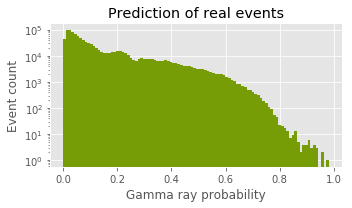

In [8]:
import matplotlib.pyplot as plt
path_build = '/home/jbehnken/07_make_FACT/build/'

plt.style.use('ggplot')
df.hist(['Gamma'], bins=100, color=(118/255, 157/255, 6/255), figsize=(5, 3))
plt.yscale('log')
plt.title('Prediction of real events')
plt.xlabel('Gamma ray probability')
plt.ylabel('Event count')
plt.tight_layout()
plt.savefig(path_build+'CNN_Real_Evaluation.pdf')
plt.show()